In [1]:
!pip install opensmile

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 996.2/996.2 kB 6.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.0/44.0 kB 6.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 9.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 141.7/141.7 kB 20.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 24.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 138.4/138.4 kB 17.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 167.4/167.4 kB 24.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for iso-639: filename=iso_639-0.4.5-py3-none-any.whl size=168840 sha256=cf5e00b1bc70c551ae41babcc3ecf5661cb76504fa145bde5b316fb846788666
  Stored in directory: /root/.cache/pip/wheels/d8/78/cc/5478ca3b1c3f602eae6f8cdbd78f909c0a0bfa0bbcb5c7771f
Successfully built iso-639


In [2]:
# 필요한 라이브러리 및 모듈 import
import librosa
import librosa.display
import numpy as np
import matplotlib.pyplot as plt
import opensmile

In [3]:
# opensmile 라이브러리 초기화
smile = opensmile.Smile(
    feature_set=opensmile.FeatureSet.GeMAPSv01b,
    feature_level=opensmile.FeatureLevel.Functionals
)

In [4]:
# 음성 파일 경로
audio_file = '/content/drive/MyDrive/보이스피싱 데이터(앞뒤 자르기만 하고 다 합친 것)/보이스피싱 데이터 머지 파일.wav'

In [5]:
# 음성 데이터 디노이징 및 MFCC 추출
def preprocess_and_extract_mfcc_vsa(audio_path, sr=48000, n_mfcc=13):
    # Load audio file and denoise
    y, sr = librosa.load(audio_path, sr=sr)
    y_denoised = librosa.effects.preemphasis(y)

    # Extract MFCC features
    mfccs = librosa.feature.mfcc(y=y_denoised, sr=sr, n_mfcc=n_mfcc)

    return mfccs

In [6]:
# VSA 특징 추출
def extract_vsa_features(audio_path):
    # Load audio signal
    y, sr = librosa.load(audio_path, sr=None)

    # Process audio signal to extract VSA features
    vsa_features = smile.process_signal(y, sr)

    return vsa_features

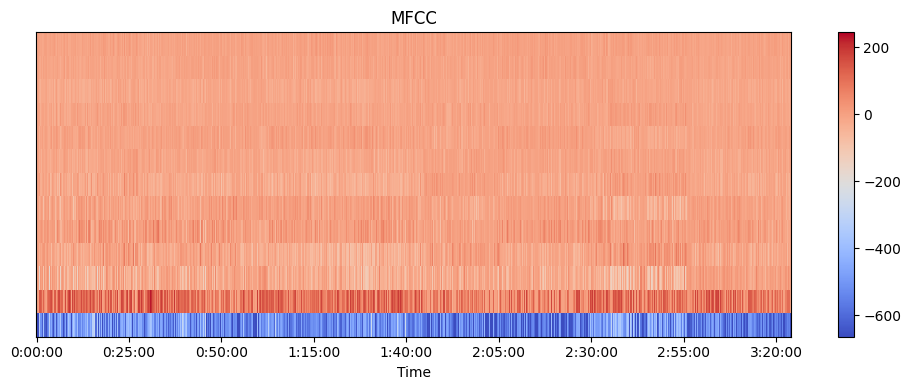

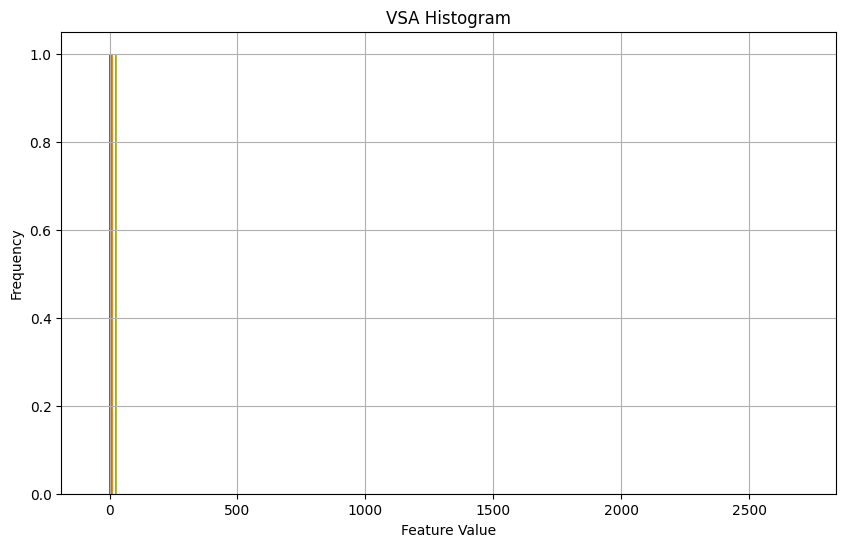

In [7]:
# MFCC와 VSA 특징 추출 및 시각화
mfcc_features = preprocess_and_extract_mfcc_vsa(audio_file)
vsa_features = extract_vsa_features(audio_file)

# 시각화
plt.figure(figsize=(10, 4))
librosa.display.specshow(mfcc_features, x_axis='time')
plt.colorbar()
plt.title('MFCC')
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 6))
plt.hist(vsa_features, bins=62)
plt.title('VSA Histogram')
plt.xlabel('Feature Value')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

In [8]:
# 각 VSA 특징의 값을 출력
for i, feature_value in enumerate(vsa_features):
    print(f"VSA Feature {i+1}: {feature_value}")

VSA Feature 1: F0semitoneFrom27.5Hz_sma3nz_amean
VSA Feature 2: F0semitoneFrom27.5Hz_sma3nz_stddevNorm
VSA Feature 3: F0semitoneFrom27.5Hz_sma3nz_percentile20.0
VSA Feature 4: F0semitoneFrom27.5Hz_sma3nz_percentile50.0
VSA Feature 5: F0semitoneFrom27.5Hz_sma3nz_percentile80.0
VSA Feature 6: F0semitoneFrom27.5Hz_sma3nz_pctlrange0-2
VSA Feature 7: F0semitoneFrom27.5Hz_sma3nz_meanRisingSlope
VSA Feature 8: F0semitoneFrom27.5Hz_sma3nz_stddevRisingSlope
VSA Feature 9: F0semitoneFrom27.5Hz_sma3nz_meanFallingSlope
VSA Feature 10: F0semitoneFrom27.5Hz_sma3nz_stddevFallingSlope
VSA Feature 11: loudness_sma3_amean
VSA Feature 12: loudness_sma3_stddevNorm
VSA Feature 13: loudness_sma3_percentile20.0
VSA Feature 14: loudness_sma3_percentile50.0
VSA Feature 15: loudness_sma3_percentile80.0
VSA Feature 16: loudness_sma3_pctlrange0-2
VSA Feature 17: loudness_sma3_meanRisingSlope
VSA Feature 18: loudness_sma3_stddevRisingSlope
VSA Feature 19: loudness_sma3_meanFallingSlope
VSA Feature 20: loudness_sma